![](https://i.ibb.co/vZrLqM2/kp108-ocenka-avto-s-probegom.jpg)


# Определение стоимости автомобилей

In [1]:
%%capture
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'2.3.3'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression, ElasticNet
import time
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from pycaret.regression import *
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(42)

In [4]:
!gdown --id 1RGZmVXLyqW8g4O4J0rt2sDsQ8Yllwh5D

Downloading...
From: https://drive.google.com/uc?id=1RGZmVXLyqW8g4O4J0rt2sDsQ8Yllwh5D
To: /content/autos.csv
44.4MB [00:02, 15.2MB/s]


In [5]:
df = pd.read_csv('/content/autos.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
df.drop(['DateCrawled', 'DateCreated', 'PostalCode', 'LastSeen', 
         'RegistrationMonth', 'NumberOfPictures', 'Model', 'NotRepaired', 'VehicleType'], axis=1, inplace=True)

In [7]:
df.head()

,Price,RegistrationYear,Gearbox,Power,Kilometer,FuelType,Brand
0,480,1993,manual,0,150000,petrol,volkswagen
1,18300,2011,manual,190,125000,gasoline,audi
2,9800,2004,auto,163,125000,gasoline,jeep
3,1500,2001,manual,75,150000,petrol,volkswagen
4,3600,2008,manual,69,90000,gasoline,skoda


In [8]:
df.columns

Index(['Price', 'RegistrationYear', 'Gearbox', 'Power', 'Kilometer',
       'FuelType', 'Brand'],
      dtype='object')

In [9]:
df['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [ ]:
exp = setup(df, target = 'Price', session_id = 42,
           normalize = True)

,Description,Value
0,session_id,42
1,Target,Price
2,Original Data,"(354369, 7)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(248058, 66)"


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1300.1772,4.242583e+06,2059.7532,0.7891,1.4573,10.3794
1,1297.1693,4.297440e+06,2073.0267,0.7880,1.5023,10.9562
2,1285.2040,4.083009e+06,2020.6458,0.7985,1.5214,10.9016
3,1294.6024,4.232926e+06,2057.4076,0.7905,1.5119,9.0008
4,1279.9283,4.094296e+06,2023.4367,0.8011,1.5038,8.2193
5,1284.2847,4.152579e+06,2037.7877,0.7953,1.4612,9.6426
6,1297.8110,4.254860e+06,2062.7311,0.7908,1.4708,10.1084
7,1293.2331,4.222134e+06,2054.7832,0.7945,1.4897,7.6870
8,1264.9442,3.943647e+06,1985.8619,0.8067,1.5045,11.6425
9,1277.0318,4.036359e+06,2009.0693,0.8018,1.4421,8.5631


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1212.9973,3.798548e+06,1948.9864,0.8111,1.4339,10.1946
1,1220.6196,3.967673e+06,1991.9019,0.8042,1.4831,10.2037
2,1202.7895,3.708780e+06,1925.8193,0.8170,1.5051,11.0760
3,1213.7048,3.879354e+06,1969.6076,0.8080,1.4895,8.3594
4,1196.1468,3.716273e+06,1927.7638,0.8194,1.4824,7.5687
5,1204.8020,3.797594e+06,1948.7417,0.8128,1.4489,9.3777
6,1213.9188,3.814835e+06,1953.1601,0.8124,1.4514,9.2694
7,1211.9820,3.824285e+06,1955.5779,0.8138,1.4721,7.6412
8,1179.9953,3.539235e+06,1881.2856,0.8265,1.4810,10.9663
9,1197.5694,3.689855e+06,1920.8995,0.8188,1.4242,8.8798


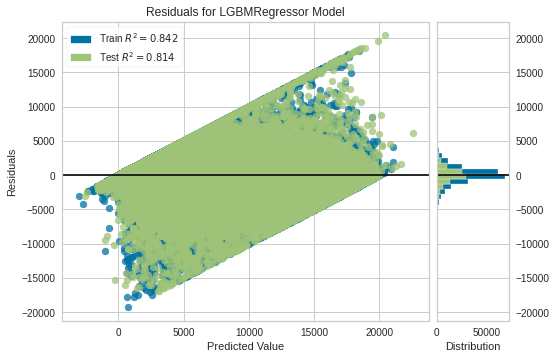

In [ ]:
plot_model(tuned_lightgbm, plot = 'residuals')

In [ ]:
save_model(tuned_lightgbm, model_name = '/content/deployment_05092021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.4,
                                max_depth=-1, min_child_samples=16,
                    

In [ ]:
from google.colab import files

In [ ]:
files.download('deployment_05092021.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import requests
url = 'https://carpricepredictapp.herokuapp.com/predict_api'
pred = requests.post(url,json={'RegistrationYear':2005, 'Gearbox':'auto', 
                               'Power':304, 
                               'Kilometer':90000, 
                               'Brand':'ford',
                               'FuelType':'gasoline' })
print(pred.json())

15730.094385166947
